In [2]:
def TrainData(s1):
    seq_line = []
    label_line = []
    error_lines = []  # 用于存储错误信息

    with open(s1, 'r', encoding='utf-8') as file:  # 使用utf-8编码打开文件以支持中文
        for line in file:
            if line.strip():  # 检查非空行
                try:
                    parts = line.strip().split('\t')  # 按制表符分割
                    if len(parts) == 2:
                        sentence = parts[0].strip()  # 第一部分为评论内容
                        label = int(parts[1].strip())  # 第二部分为标签（转换为整数）

                        # 对中文文本进行编码处理
                        encoded_sentence = encode(sentence)

                        seq_line.append(encoded_sentence)  # 存储编码后的评论内容
                        label_line.append(label)    # 存储标签
                    else:
                        error_lines.append(f"Line format error: {line.strip()}")  # 如果不是2部分则记录错误
                except ValueError as e:
                    error_lines.append(f"Error processing line: {line.strip()}\nValueError: {e}")

    # 打印所有收集到的错误信息
    if error_lines:
        print("\n".join(error_lines))

    return seq_line, label_line

def encode(text):  # 对中文文本进行编码的示例函数
    # 这里我们简单地将每个字符转换为它的Unicode码点
    encoded_text = [ord(char) for char in text]
    return encoded_text

# 示例调用
# X, y = TrainData('sentimenttrain.txt')

In [ ]:
import numpy as np
import h5py
import numpy.random
from keras.models import model_from_json
from keras.models import load_model
np.random.seed(24)  # reproducibility
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers import Dense, LSTM, Flatten,Lambda, TimeDistributed, Input, Masking, Bidirectional
from keras.models import Model
from keras.datasets import imdb
import pickle
# import Processingold as pgo
# import Processing as pg
from  keras import regularizers
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
# from sklearn.model_selection import train_test_split
#from keras.utils.vis_utils import plot_model
from tensorflow.python.keras.utils.vis_utils import  plot_model
from tensorflow.python.keras import wrappers
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint
import keras
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from keras.utils import np_utils
# print("未进行特征选择")
# print("-----SVM分类-----")
# from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization
# from tensorflow.python.keras import VGG16
#将VGG16卷积基实例化
# from keras.applications.vgg16 import VGG16
# from sklearn.model_selection import LeaveOneOut
# conv_base=VGG16(weights='imagenet',include_top=False)

seed=100000
max_features = 512
maxlen = 512
embedding_size = 8
# Convolution
nb_filter = 32
pool_length = 2
# BiLSTM
bilstm_output_size = 30
# TrainingSet
batch_size =256
epochs =15

# numpy.random.seed(seed)

X,y=TrainData("train - sentiment.txt")

X1,y1=TrainData("test - sentiment.txt")
# 检查序列长度并进行填充
X = sequence.pad_sequences(X, maxlen=maxlen)
X1 = sequence.pad_sequences(X1, maxlen=maxlen)
y_test=y1
y_train=y
# 假设 seq_line 是您的编码后的评论内容
# 获取当前最大的单词索引
max_index = max(max(seq) for seq in X)

# 更新 max_features 至少为 max_index + 1
max_features = max(max_index + 1, max_features) 


print('Loading data...')

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.15, random_state=seed,shuffle=True)
# y_train=np.array(y_train)
# X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_train = sequence.pad_sequences(X, maxlen=maxlen)
X_test = sequence.pad_sequences(X1, maxlen=maxlen)
X_train = np.array(X_train )
y_train=np.array(y)
X_test = np.array(X_test)
y_test=np.array(y_test)


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# 随机森林分类器
rfc = RandomForestClassifier(n_estimators=10, random_state=35,criterion='entropy',max_depth=50)

# 训练随机森林分类器
rfc.fit(X_train, y_train)

# 使用随机森林分类器进行特征选择
sfm = SelectFromModel(rfc, prefit=True, max_features=max_features)
X_train = sfm.transform(X_train)
X_test = sfm.transform(X_test)
# 输出新的训练集和测试集
print("X_train_new shape:", X_train.shape)
print("X_test_new shape:", X_test.shape)
maxlen = X_train.shape[1]
# joblib.dump(rfc, 'data1/pretrain/rfc_modeldataall.model')
# 保存特征选择模型
# joblib.dump(sfm, 'data1/pretrain/feature_selection_model.pkl')
joblib.dump(sfm, 'data1/pretrain/feature_selection_model.model')

2024-09-21 11:33:49.868865: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-21 11:33:49.868923: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Loading data...


In [ ]:
import numpy as np
import h5py
import numpy.random
from keras.models import model_from_json
from keras.models import load_model
np.random.seed(24)  # reproducibility
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers import Dense, LSTM, Flatten,Lambda, TimeDistributed, Input, Masking, Bidirectional
from keras.models import Model
from keras.datasets import imdb
import pickle
# import Processingold as pgo
# import Processing as pg
from  keras import regularizers
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
# from sklearn.model_selection import train_test_split
#from keras.utils.vis_utils import plot_model
from tensorflow.python.keras.utils.vis_utils import  plot_model
from tensorflow.python.keras import wrappers
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint
import keras
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from keras.utils import np_utils
# print("未进行特征选择")
# print("-----SVM分类-----")
# from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization
# from tensorflow.python.keras import VGG16
#将VGG16卷积基实例化
# from keras.applications.vgg16 import VGG16
# from sklearn.model_selection import LeaveOneOut
# conv_base=VGG16(weights='imagenet',include_top=False)

seed=100000
max_features = 512
maxlen = 512
embedding_size = 8
# Convolution
nb_filter = 32
pool_length = 2
# BiLSTM
bilstm_output_size = 30
# TrainingSet
batch_size =256
epochs =15

# numpy.random.seed(seed)

X,y=TrainData("train - sentiment.txt")

X1,y1=TrainData("test - sentiment.txt")
# 检查序列长度并进行填充
X = sequence.pad_sequences(X, maxlen=maxlen)
X1 = sequence.pad_sequences(X1, maxlen=maxlen)
y_test=y1
y_train=y
# 假设 seq_line 是您的编码后的评论内容
# 获取当前最大的单词索引
max_index = max(max(seq) for seq in X)

# 更新 max_features 至少为 max_index + 1
max_features = max(max_index + 1, max_features) 


print('Loading data...')

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.15, random_state=seed,shuffle=True)
# y_train=np.array(y_train)
# X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_train = sequence.pad_sequences(X, maxlen=maxlen)
X_test = sequence.pad_sequences(X1, maxlen=maxlen)
X_train = np.array(X_train )
y_train=np.array(y)
X_test = np.array(X_test)
y_test=np.array(y_test)


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# 随机森林分类器
rfc = RandomForestClassifier(n_estimators=10, random_state=35,criterion='entropy',max_depth=50)

# 训练随机森林分类器
rfc.fit(X_train, y_train)

# 使用随机森林分类器进行特征选择
sfm = SelectFromModel(rfc, prefit=True, max_features=max_features)
X_train = sfm.transform(X_train)
X_test = sfm.transform(X_test)
# 输出新的训练集和测试集
print("X_train_new shape:", X_train.shape)
print("X_test_new shape:", X_test.shape)
maxlen = X_train.shape[1]
joblib.dump(sfm, 'data1/pretrain/feature_selection_model.model')

print('Build model...')
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
cvscores=[]
for train,test in kfold.split(X_train,y_train):
    model = Sequential()
    model.add(Embedding(max_features, embedding_size, input_length=maxlen))
    model.add(Dropout(0.5))
    model.add(Convolution1D(filters=nb_filter,
                            kernel_size=5,
                            strides=1,
                            padding='valid',
                            activation='relu'))
    # model.add(Dropout(0.2))
    model.add(MaxPooling1D(pool_size=pool_length))
    model.add(Convolution1D(filters=nb_filter,
                            kernel_size=3,
                            strides=1,
                            padding='valid',
                            activation='relu'))
    # model.add(Dropout(0.2))
    model.add(MaxPooling1D(pool_size=pool_length))
    model.add(Convolution1D(filters=nb_filter,
                            kernel_size=2,
                            strides=1,
                            padding='valid',
                            activation='relu'))
    # model.add(Dropout(0.2))

    model.add(Bidirectional(LSTM(bilstm_output_size, return_sequences=True)))
#     model.add(Dropout(0.3))    
    model.add(Bidirectional(LSTM(bilstm_output_size)))
    # model.add(Dense(units=1024,activation="relu",name="my_seventh_layer",kernel_regularizer=regularizers.l2()))  #增加两个隐层
    # model.add(Bidirectional(GRU(bilstm_output_size, return_sequences=True)))
    # model.add(Bidirectional(GRU(bilstm_output_size)))
    # model.add(Dense(units=512,activation="relu",name="my_sixth_layer",kernel_regularizer=regularizers.l2()))  #增加两个隐层
    # model.add(Dense(units=256,activation="relu",name="my_fifth_layer",kernel_regularizer=regularizers.l2()))  #增加两个隐层
    # model.add(Dropout(0.3))

    model.add(Dense(units=512,activation="relu",name="my_forth_layer",kernel_regularizer=regularizers.l2()))
    # model.add(Dropout(0.3))
    model.add(Dense(units=256,activation="relu",name="my_third_layer",kernel_regularizer=regularizers.l2()))
#     model.add(Dropout(0.3))
    # model.add(Dense(units=64, activation="relu", name="my_second_layer",kernel_regularizer=regularizers.l2()))
    # model.add(Dense(units=16, activation="relu", name="my_first01_layer"))
    # model.add(Dense(units=32, activation="relu", name="my_first_layer",kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(Dense(1,name="my_last_layer",kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    # model.add(Activation('Swish'))
#     model.add(Activation('tanh'))
    # optimizer = Adam(lr = 0.001)
    # learnrate=0.05
    # decay=learnrate/(100-epochs)
    model.compile(loss='binary_crossentropy',
                  # loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                  # optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy']
                  )
    # Training
    print('Training...')


    history = History()
    model_checkpoint = ModelCheckpoint('temp_model.hdf5', monitor='loss', save_best_only=True)
    tb_cb = keras.callbacks.TensorBoard(log_dir='log', write_images=1, histogram_freq=0)
    callbacks = [
        history,
        model_checkpoint,
        tb_cb
    ]

    history = model.fit(X_train[train], y_train[train], batch_size=batch_size,
                        epochs=epochs, verbose=1, callbacks=callbacks,
                        validation_data=(X_train[test], y_train[test]),
                        # class_weight={0:3,1:1}
                        )
    scores=model.evaluate(X_train[test],y_train[test],verbose=1)
    print("%s:%.2f%%" % (model.metrics_names[1],scores[1]*100))
    cvscores.append(scores[1]*100)
scrore=numpy.mean(cvscores)
std=numpy.std(cvscores)

print('5 fold mean score:', scrore)
print('5 fold std score:', std)
# print('leaveone mean score:', scrore)
# print('leaveone  std score:', std)
# model.save('data1/pretrain/fine_tune_model.h5')
# model.save_weights('data1/pretrain/fine_tune_model_weight')
print(model.summary())
print(history.history)
from matplotlib import pyplot as plt

history = history
plt.plot()
# summarize history for acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DCNN+BiLSTM sentiment analysis Pretraining accuracy')
plt.ylabel('accuracy value')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DCNN+BiLSTM sentiment analysis Pretraining loss')
plt.ylabel('loss value')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
from sklearn.metrics import classification_report

# X_test = sequence.pad_sequences(X1, maxlen=maxlen)
# y_test=y1

import numpy as np
from sklearn import metrics
accy = history.history['accuracy']
np_accy = np.array(accy)
# np.savetxt('data1/pretrain/save_acc.txt', np_accy)
model.save('data1/pretrain/sentment/dcnnmodel.h5')
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
print('############################################')

print("model roc")
pred = model.predict(X_test)
# print("xtest",X_test)
# print("ypre",pred)
#############画图部分

import matplotlib.pyplot as plt
fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr1, tpr1)
plt.title('DCNN+BiLSTM sentiment analysis test ROC curve')
plt.plot(fpr1, tpr1, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(fpr1, tpr1)
plt.plot([0, 1], [0, 1],'r--')
plt.title('DCNN+BiLSTM sentiment analysis test ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()



from sklearn.decomposition import PCA
model_feat = Model(inputs=model.input,outputs=model.get_layer('my_third_layer').output) #dnnbilstm模型特征输入
feat_train = model_feat.predict(X_train)#dnnbilstm模型进行特征提取
print(feat_train.shape)
feat_test = model_feat.predict(X_test)

from sklearn.preprocessing import RobustScaler
# 数据标准化
scaler = RobustScaler()
feat_train = scaler.fit_transform(feat_train)
feat_test = scaler.transform(feat_test)

# from sklearn.decomposition import PCA
# # # PCA方法训练并求取新维度的数据
# pca = PCA()
# pca = pca.fit(feat_train)
# feat_train = pca.transform(feat_train)
# # # print(feat_train.shape)
# # joblib.dump(pca, 'data1/pretrain/pca_modeldataall.model')
# # # pca2 = pca.fit(feat_test)
# feat_test = pca.transform(feat_test)
# print(feat_test.shape)
# #
# pca.explained_variance_# 查看降维后每个新特征向量上所带的信息量大小（方差大小）
# pca.explained_variance_ratio_#查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
# pca.explained_variance_ratio_.sum()#总占比

# from sklearn.preprocessing import StandardScaler
# # 数据标准化
# scaler = StandardScaler()
# feat_train = scaler.fit_transform(feat_train)
# feat_test = scaler.transform(feat_test)

from sklearn.decomposition import PCA
# # PCA方法训练并求取新维度的数据
pca = PCA()
pca = pca.fit(feat_train)
feat_train = pca.transform(feat_train)
# # print(feat_train.shape)
joblib.dump(pca, 'data1/pretrain/pca_modeldataall.model')
# # pca2 = pca.fit(feat_test)
feat_test = pca.transform(feat_test)
print(feat_test.shape)



print("Ten binary classifiers based on transfer learning, Logistic Regression (LR), Support Vector Machine (SVM), Bagging Classifier,Gradient Boosting Decision Tree (XGBoost), K-Nearest Neighbors (KNN), Decision Tree (Dtree), and Naive Bayes (NB) respectively.
")

from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# print("未进行特征选择")
print("-----SVM分类-----")
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
svm = SVC(C=5,kernel='poly',gamma=0.2,degree=3,coef0=0.8,tol=1e-3)
svm.fit(feat_train, y_train)
joblib.dump(svm, 'data1/pretrain/SVM_modeldataall.model')
# svm.save('data1/pretrain/svm_modeldataall.model')
y_train_pred = svm.predict(feat_train)
y_test_pred = svm.predict(feat_test)
# y_val_pred=svm.predict(feat_val)
# score1=cross_val_score(svm,feat_train,y_train,cv=10)
# print("svm 10折交叉验证训练集SVM",score1)
# score1=cross_val_score(svm,feat_test,y_test,cv=10)
# print("svm 10折交叉验证测试集SVM",score1)
svm_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
svm_test = accuracy_score(y_test,y_test_pred)  #测试集准确率
# svm_val=accuracy_score(y_val,y_val_pred)  #验证集准确率
auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
svm_train_acc =(metrics_out[1][1]+metrics_out[0][0])/ (metrics_out[1][0] + metrics_out[1][1]+metrics_out[0][0] + metrics_out[0][1]) #训练集准确率
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
svm_test_acc =(metrics_out[1][1]+metrics_out[0][0])/ (metrics_out[1][0] + metrics_out[1][1]+metrics_out[0][0] + metrics_out[0][1]) #训练集准确率

print('SVM MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('SVM SP train/test  %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('SVM SN train/test %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('SVM auc-roc train/test  %.4f/%.4f' % (auctrian,aucteast))
print('SVM AUC train/test  %.4f/%.4f' % (AUCtrian,AUCteast))
print(classification_report(y_test,y_test_pred))
print('SVM train/test/val accuracies %.4f/%.4f' % (svm_train,svm_test))
print('SVM train_acc/test_acc/val accuracies %.4f/%.4f' % (svm_train_acc,svm_test_acc))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("-----随机森林-------")
####随机森林0-1分类模型
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(n_estimators=10, random_state=35,criterion='entropy',max_depth=50)
RF.fit(feat_train, y_train)
joblib.dump(RF, 'data1/pretrain/RF_modeldataall.model')
y_train_pred = RF.predict(feat_train)
y_test_pred = RF.predict(feat_test)
tree_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
tree_test = accuracy_score(y_test,y_test_pred)  #测试集准确率

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('RF MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('RF SP-train/test  %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('RF SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('RF auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print('RF AUC-train/test  %.4f/%.4f' % (AUCtrian,AUCteast))
# auc=metrics.roc_auc_score(y_test,y_test_pred)
# print("RF auc",auc)
print(classification_report(y_test,y_test_pred))
print('RandomForestClassifier train/test accuracies %.4f/%.4f' % (tree_train,tree_test))

# XGBOOST
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
print("xgbost------")
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
xgbmodel = xgb.XGBClassifier(max_depth=50, n_estimators=100, learning_rate=0.1,
                          colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic',
                          eta=0.3,subsample=0.8).fit(feat_train, y_train)
joblib.dump(xgbmodel, 'data1/pretrain/XGB_modeldataall.model')
y_train_pred = xgbmodel.predict(feat_train)
y_test_pred = xgbmodel.predict(feat_test)
xgb_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
xgb_test = accuracy_score(y_test,y_test_pred)  #测试集准确率

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('xgb MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('xgb SP-train/test  %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('xgb SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('xgb auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
# print('RF AUC-train/test MCC-trian %.3f/%.3f' % (AUCtrian,AUCteast))
# auc=metrics.roc_auc_score(y_test,y_test_pred)
# print("xgbost auc",auc)
print(classification_report(y_test,y_test_pred))
print('xgbost train/test accuracies %.4f/%.4f' % (xgb_train,xgb_test))
# prediction = model.predict(X_test)
# cm = confusion_matrix(y_test, prediction)
# print(cm)
# print('Accuracy', accuracy_score(y_test, prediction))
# print(classification_report(y_test, prediction))

print("---------knn评估-------")
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2,p=1,metric='euclidean')
knn.fit(feat_train,y_train)
joblib.dump(knn, 'data1/pretrain/KNN_modeldataall.model')
y_train_pred = knn.predict(feat_train)
y_test_pred = knn.predict(feat_test)
tree_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
tree_test = accuracy_score(y_test,y_test_pred)  #测试集准确率
auc=metrics.roc_auc_score(y_test,y_test_pred)

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
# fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
# AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
# fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
# AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('KNN MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('KNN SP-train/test %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('KNN SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('KNN auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print("KNN auc",auc)
print(classification_report(y_test,y_test_pred))
print('KNeighborsClassifier train/test accuracies %.4f/%.4f' % (tree_train,tree_test))
# k_preduct=knn.predict(X_test)
# print("knn准确率",accuracy_score(y_test,k_preduct))


print("------高斯朴素贝叶斯(NB)-----------")
from  sklearn.naive_bayes import GaussianNB
glt = GaussianNB(var_smoothing=1e-05)
glt.fit(feat_train, y_train)
print('保存gnb模型...')
joblib.dump(glt, 'data1/pretrain/GNB_modeldataall.model')
print('oooo############################################oooo')
y_train_pred = glt.predict(feat_train)
y_test_pred = glt.predict(feat_test)
glt_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
glt_test = accuracy_score(y_test,y_test_pred)  #测试集准确率
auc=metrics.roc_auc_score(y_test,y_test_pred)

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)

mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)

mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('NB MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('NB SP-train/test  %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('NB SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('NB auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print("NB auc",auc)
print(classification_report(y_test,y_test_pred))
print('GaussianNB train/test accuracies %.4f/%.4f' % (glt_train,glt_test))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred, display_labels=["0", "1"], cmap=plt.cm.Reds, colorbar=True)
plt.title("Sentiment Analysis Confusion Matrix")
plt.show()



print("------逻辑回归评估结果-----")
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state=35,max_iter=128,tol=10,penalty='l2',solver='sag')
lg.fit(feat_train, y_train)
joblib.dump(lg, 'data1/pretrain/LG_modeldataall.model')
y_train_pred = lg.predict(feat_train)
y_test_pred = lg.predict(feat_test)
tree_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
tree_test = accuracy_score(y_test,y_test_pred)  #测试集准确率
auc=metrics.roc_auc_score(y_test,y_test_pred)

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
# fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
# AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
# fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
# AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('LG MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('LG SP-train/test %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('LG SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('LG auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print("LogisticRegression auc",auc)
print(classification_report(y_test,y_test_pred))
print('LogisticRegression train/test accuracies %.4f/%.4f' % (tree_train,tree_test))
# y_pre=lg.predict(X_test)
# print("逻辑回归准确率",lg.score(y_pre, y_test))
# print(classification_report(y_test, y_pre))

print("-----决策树分类器-----")
## 我们使用单一决策树分类：
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None)   #选择决策树为基本分类器
from sklearn.metrics import accuracy_score  #计算准确率
tree = treemodel.fit(feat_train,y_train)
print('保存dtree模型...')
#svm_model.save('svm_model.model')
joblib.dump(tree, 'data1/pretrain/dtree_modeldataall.model')
print('oooo############################################oooo')
y_train_pred = tree.predict(feat_train)
y_test_pred = tree.predict(feat_test)
tree_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
tree_test = accuracy_score(y_test,y_test_pred)  #测试集准确率
auc=metrics.roc_auc_score(y_test,y_test_pred)

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
# fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
# AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
# fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
# AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('TREE MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('TREE SP-train/test %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('TREE SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('TREE auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print("Decision tree auc",auc)
print(classification_report(y_test,y_test_pred))
print('Decision tree train/test accuracies %.4f/%.4f' % (tree_train,tree_test))
#Decision tree train/test accuracies 1.000/0.833

print("-----bagging分类器-----")
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None)   #选择决策树为基本分类器
bag = BaggingClassifier(base_estimator=tree,n_estimators=50,max_samples=1.0,max_features=1.0,bootstrap=True,
                        bootstrap_features=False,n_jobs=1,random_state=1)
from sklearn.metrics import accuracy_score
bag = bag.fit(feat_train,y_train)
joblib.dump(bag, 'data1/pretrain/BAG_modeldataall.model')
y_train_pred = bag.predict(feat_train)
y_test_pred = bag.predict(feat_test)
bag_train = accuracy_score(y_train,y_train_pred)
bag_test = accuracy_score(y_test,y_test_pred)
auc=metrics.roc_auc_score(y_test,y_test_pred)

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
# fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
# AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('Bagging MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('Bagging SP-train/test  %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('Bagging SN-train/test %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('Bagging auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print("Bagging auc",auc)
print(classification_report(y_test,y_test_pred))
print('Bagging train/test accuracies %.4f/%.4f' % (bag_train,bag_test))

print("-----LightGBM分类器-----")
from sklearn.model_selection import GridSearchCV
import pandas as pd
from lightgbm.sklearn import LGBMClassifier# 导入LGBMClassifier函数
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 分类结果评价函数
lgbestimator = LGBMClassifier()

estimator = LGBMClassifier(num_leaves=31,verbosity=-1)
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40,80,100],
    'min_data_in_leaf':[20, 40,50],
}
gbm = GridSearchCV(estimator, param_grid)
lgb=gbm.fit(feat_train, y_train)
print('Best parameters found by grid search are:', gbm.best_params_)
# lgb=model.fit(feat_train, y_train)  # 在训练集上训练模型
# print(model)
print('保存lgb模型...')
#svm_model.save('svm_model.model')
joblib.dump(lgb, 'data1/pretrain/lgb_modeldataall.model')
print('oooo############################################oooo')
y_train_pred = lgb.predict(feat_train)
y_test_pred = lgb.predict(feat_test)
lgb_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
lgb_test = accuracy_score(y_test,y_test_pred)  #测试集准确率
auc=metrics.roc_auc_score(y_test,y_test_pred)

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
# fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
# AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
# fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
# AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('lgb MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('lgb SP-train/test %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('lgb SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('lgb auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print("lgb auc",auc)
print(classification_report(y_test,y_test_pred))
print('lgb train/test accuracies %.4f/%.4f' % (lgb_train,lgb_test))

print("###########集成学习#############")
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

estimators=[('rf',RandomForestClassifier(n_estimators=100,max_depth=None)),
            # ('kneiber',KNeighborsClassifier(n_neighbors=5,leaf_size=30,metric="minkowski")),
            ('svm',SVC(C=5,kernel='poly',gamma=0.2,degree=3,coef0=0.8,tol=1e-3,max_iter=100000)),
            ('guss',GaussianNB()),
            ('xgb',xgb.XGBClassifier(max_depth=50, n_estimators=100, learning_rate=0.1,
                          colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic',
                          eta=0.3,subsample=0.8)),
            ('lgb', LGBMClassifier(num_leaves=31,learning_rate=0.1,n_estimators=100,verbosity=-1)),
#             ('dec',DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None)),
            ('bag', BaggingClassifier(base_estimator=tree,n_estimators=50,max_samples=1.0,max_features=1.0,bootstrap=True,
                        bootstrap_features=False,n_jobs=1,random_state=1)),
            # ('logr',LogisticRegression(random_state=1000,max_iter=128,tol=5,penalty='l2',solver='sag'))
            ]

final_estimator=GradientBoostingClassifier(n_estimators=25,subsample=1.0,min_samples_leaf=25,
                                           max_features=None,random_state=42)

modelesemble=StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

esemble=modelesemble.fit(feat_train,y_train)
joblib.dump(esemble, 'data1/pretrain/ESEM_modeldataall.model')
train_pre=modelesemble.predict(feat_train)
test_pre=modelesemble.predict(feat_test)
# print("集成模型train_pre",train_pre)
# print("集成模型test_pre",test_pre)
# val_pre=reg.predict(feat_val)
metrics_outtrain=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
# print("集成学习训练集train,sn,sp",Sensitivitytrian,Specificitytrian)
enmcctrian = round(metrics.matthews_corrcoef(y_train,train_pre),3)
enmcctest = round(metrics.matthews_corrcoef(y_test, test_pre),3)
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytest= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
# print("test,sn,sp",Sensitivitytest,Specificitytest)
# metrics_out=confusion_matrix(y_val,y_val_pred)
# Sensitivityval = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
# Specificityval = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
# print('集成学习 SP-train/test %.4f/%.4f' % (Specificitytrian,Specificitytest))
# print('集成学习 SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
# print("val,sn,sp",Sensitivityval,Specificityval)
en_train=accuracy_score(y_train,train_pre)
en_test = accuracy_score(y_test,test_pre)
# en_val = accuracy_score(y_val,val_pre)
# print("集成学习训练集精确度",en_train)
# print("集成学习开发集精确度",en_test)
# print("集成学习验证集精确度",en_val)
auctrian=metrics.roc_auc_score(y_train,train_pre)
aucteast=metrics.roc_auc_score(y_test,test_pre)
# print('集成学习 auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))

print('esemble MCC-train/test %.4f/%.4f' % (enmcctrian,enmcctest))
print('esemble SP-train/test  %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('esemble SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('esemble auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
# print("esemble auc",auc)
print(classification_report(y_test,test_pre))
print('esemble train/test accuracies %.4f/%.4f' % (en_train,en_test))




#shap explain
# import matplotlib.pyplot as plt
# import shap
# # Assign the feature matrix to X and the target vector to y
# plt.rcParams['axes.unicode_minus']=False
# X = feat_train
# y = y_train
# # feature_names = X.feature_names
# # print('feature_names',feature_names)
# explainer = shap.Explainer(lg, X)
# shap_values = explainer(X)
# # 绘制特征重要性图表
# shap.summary_plot(shap_values, X)
# #heat
# shap.plots.heatmap(shap_values)
# #bar
# shap.summary_plot(shap_values, X, plot_type="bar")

# # 展示图表
# plt.show()


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

svm = SVC(probability=True)


def plot_roc_curve(name, method, colorname, X_test, y_test):
    """
    绘制单个模型的ROC曲线
    Args:
        name: str, 模型的名称
        method: 模型的实例化对象
        colorname: str, 曲线的颜色名称
        X_test: 测试数据集的特征
        y_test: 测试数据集的标签
    """
    y_test_preds = method.predict(X_test)
    y_test_predprob = method.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=5, label='{} (AUC={:.4f})'.format(name, roc_auc), color=colorname)


def multi_models_roc(names, sampling_methods, colors, X_test, y_test, save=True, dpi=100):
    """
    将多个机器模型的ROC曲线输出到一张图上
    Args:
        names: list, 多个模型的名称
        sampling_methods: list, 多个模型的实例化对象
        X_test: 测试数据集的特征
        y_test: 测试数据集的标签
        save: bool, 选择是否将结果保存（默认为True）
        dpi: int, 图像的分辨率（默认为100）
    Returns:
        返回图片对象plt
    """
    plt.figure(figsize=(10, 10), dpi=dpi)
    for (name, method, colorname) in zip(names, sampling_methods, colors):
        plot_roc_curve(name, method, colorname, X_test, y_test)
    plt.plot([0, 1], [0, 1], '--', lw=5, color='grey')
    plt.axis('square')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate', fontsize=20)
    plt.ylabel('True Positive Rate', fontsize=20)
    # plt.title('The ROC Curve of the alternative test dataset with StandardScaler ', fontsize=20)
    plt.title('The ROC Curve of Sentment Analysis test dataset', fontsize=25)
    plt.legend(loc='lower right', fontsize=15)
    # plt.subplots_adjust(top=1, bottom=1, right=1, left=1, hspace=0, wspace=0)
    plt.margins(0, 0)
    if save:
        # plt.savefig('cancerdata/mainresult/multi_models_roc.png', bbox_inches='tight')
        plt.savefig('sentment/SentmentAnalysismulti_models_roc.png')
    plt.show()
    return plt


names = ['Logistic Regression',
         'Random Forest',
         'XGBoost',
         'SVM',
         'GaussianNB',
         'Bagging',
         'KNeighbors',
         'DecisionTree',
         'Ensemble',
         'LGBM']
sampling_methods = [lg,
                    RF,
                    xgbmodel,
                    svm,
                    glt,
                    bag,
                    knn,
                    treemodel,
                    modelesemble,
                    lgbestimator
                    ]
colors = ['crimson',
          'orange',
          'gold',
          'mediumseagreen',
          'steelblue',
          'mediumpurple',
          'yellow',
          'cyan',
          'blue',
          'brown'
          ]
# 训练每个模型
for method in sampling_methods:
    method.fit(feat_train, y_train)
# #train roc figure
# multi_models_roc(names, sampling_methods, colors, feat_train, y_train, save=True, dpi=100)
#test roc figure
multi_models_roc(names, sampling_methods, colors, feat_test, y_test, save=True, dpi=100)


In [ ]:
import numpy as np

def ReadDataWithoutLabels(file_path):
    seq_line = []
    error_lines = []  # 用于存储错误信息

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip():  # 检查非空行
                try:
                    sentence = line.strip()  # 整行作为评论内容

                    # 对中文文本进行编码处理
                    encoded_sentence = encodenew(sentence)

                    seq_line.append(encoded_sentence)  # 存储编码后的评论内容
                except Exception as e:
                    error_lines.append(f"Error processing line: {line.strip()}\nError: {e}")

    # 打印所有收集到的错误信息
    if error_lines:
        print("\n".join(error_lines))

    return seq_line

def encodenew(text):  # 对中文文本进行编码的示例函数
    # 将每个字符转换为它的Unicode码点
    encoded_text = [ord(char) for char in text]
    return encoded_text

# 示例调用，确保文件路径正确并存在相应的数据文件
X_test_encoded = ReadDataWithoutLabels('student.txt')
X_test_encoded = sequence.pad_sequences(X_test_encoded, maxlen=maxlen)
model_feat = Model(inputs=model.input,outputs=model.get_layer('my_third_layer').output) #dnnbilstm模型特征输入
feat_val = model_feat.predict(X_test_encoded)#dnnbilstm模型进行特征提取
# 确保所有序列具有相同长度，例如使用填充（padding）
# max_length = max(len(seq) for seq in X_test_encoded)  # 找到最长序列的长度
# X_test_padded = np.array([seq + [0] * (max_length - len(seq)) for seq in X_test_encoded])  # 填充至最大长度

# 假设您的模型已经定义并训练完成，可以直接使用predict方法进行预测。
try:
    y_test_preds = svm.predict(feat_val)
except ValueError as e:
    print(f"Prediction Error: {e}")
    y_test_preds = None  # 如果发生错误，将 y_test_preds 设置为 None

# 输出预测结果（可选）
if y_test_preds is not None:
    print("Predictions:", y_test_preds)
else:
    print("No predictions were made due to an error.")



In [ ]:
import matplotlib.pyplot as plt
fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr1, tpr1)
plt.title('DCNN+BiLSTM sentiment test ROC curve')
plt.plot(fpr1, tpr1, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.rcParams['font.sans-serif'] = ['Ubuntu-MI.ttf']
plt.plot(fpr1, tpr1)
plt.plot([0, 1], [0, 1],'r--')
plt.title('DCNN+BiLSTM sentiment test ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# 随机森林分类器
rfc = RandomForestClassifier(n_estimators=10, random_state=35,criterion='entropy',max_depth=50)

# 训练随机森林分类器
rfc.fit(X_train, y_train)

# 使用随机森林分类器进行特征选择
sfm = SelectFromModel(rfc, prefit=True, max_features=max_features)
joblib.dump(sfm, 'data1/pretrain/sfm_modeldataall.model')

In [ ]:
from keras.preprocessing import sequence
from keras.models import load_model
from keras.models import Model
import joblib,sys
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras.models import load_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
def predict(data:str):
    results = []
    maxlen = 512
    X,seq = TrainData(data)

    if X is None and len(seq)>0:
        results.append(seq[0] + ": There are **ILLEGAL** characters in this sequence!!!")
        return results
    current_dir = sys.path[0]
    print(current_dir)
    print('Loading data...')
    print('Pad sequences (samples x time)')
    X_test = sequence.pad_sequences(X, maxlen=maxlen)
    feat_test=X_test
    # max_index = max(max(seq) for seq in X)
    # 更新 max_features 至少为 max_index + 1
    # max_features = max(max_index + 1, max_features)

    # pca_model=joblib.load(current_dir + '/models/pretrainsentment/pca_modeldataall.model')
    print('加载sfm-ok')
    # rfc = load_model(current_dir + '/models/pretrainsentment/rfcmodel.h5')
    # 加载特征选择模型


    # 使用加载的特征选择模型转换数据
    # X_train_new = sfm.transform(X_train)
    # X_test_new = sfm.transform(X_test)
    # sfm = joblib.load('feature_selection_model.pkl')
    sfm = joblib.load(current_dir + '/data1/pretrain/feature_selection_model.pkl')
    # sfm = SelectFromModel(rfc, prefit=True, max_features=maxlen)
    # X_train = sfm.transform(X_train)
    feat_test = sfm.transform(feat_test)
    base_model=load_model(current_dir + '/data1/pretrain/sentment/dcnnmodel.h5')
    model_feat = Model(inputs=base_model.input,outputs=base_model.get_layer('my_third_layer').output)
    feat_test=model_feat.predict(feat_test)
    pca_model=joblib.load(current_dir + '/data1/pretrain/pca_modeldataall.model')
    print('加载pc-ok')
    # # Load the model using Keras load_model function
    # pca_model = load_model(current_dir + '/models/pretrainsentment/pca_modeldataall.model')

    # lda_model=joblib.load(current_dir + '/models/pretrain/LDA_modeldataall.model')
    # pca_model=joblib.load('models/pretrain/pca_modeldataall.model')
    feat_test = pca_model.transform(feat_test)
    print('X_test shape:', X_test.shape)
    print('Build model...')


    models = [
        '/data1/pretrain/SVM_modeldataall.model',
        '/data1/pretrain/BAG_modeldataall.model',
        # 'models/pretrainsentment/dtree_modeldataall.model',
        '/data1/pretrain/ESEM_modeldataall.model',
        # 'models/pretrain/GNB_modeldataall.model',
        '/data1/pretrain/lgb_modeldataall.model',
        '/data1/pretrain/RF_modeldataall.model',
        '/data1/pretrain/XGB_modeldataall.model',
        # 'models/pretrain/LG_modeldataall.model',
        '/data1/pretrain/KNN_modeldataall.model'
    ]

    y_test_pred_sum = None
    for model in models:
        svm_model=joblib.load(current_dir + '/' +model)
        print("加载成功，开始预测")
        # svm_model=load_model(current_dir + '/' +model)
        y_test_pred = svm_model.predict(feat_test)
        print("svm", y_test_pred)
        if y_test_pred_sum is not None:
            y_test_pred_sum += y_test_pred
        else:
            y_test_pred_sum = y_test_pred

    print("seq",seq)
    print('X_test pre:', y_test_pred_sum)

    j = 0
    for res in y_test_pred_sum:
        if res>=4:
            results.append(seq[j] + " : This is an positive")
        else:
            results.append(seq[j] + " : This is an negative")
        j+=1

    return results

def TrainData(data):
    seq_line = []
    seq_soure = []

    # Convert the input data to bytes and decode using utf-8 encoding
    data_bytes = data.encode('utf-8')
    lines = data_bytes.decode('utf-8').split("\n")

    for seq in lines:
        seq = seq.strip()
        if len(seq) != 0 and not seq.startswith(">"):
            encode_seq = encode(seq)
            if encode_seq is None:
                return None, [seq]
            seq_line.append(encode_seq)
            seq_soure.append(seq)

    return seq_line, seq_soure



def encode(text):  # 对中文文本进行编码的示例函数
    # 这里我们简单地将每个字符转换为它的Unicode码点
    encoded_text = [ord(char) for char in text]
    return encoded_text

print(predict("#考研考公同时上岸选择哪个#赞许这个观点现在求稳最重要\n"))


Loading data...
Build model...


2024-09-22 08:45:11.702559: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-09-22 08:45:11.702626: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-09-22 08:45:11.702673: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lmy): /proc/driver/nvidia/version does not exist
2024-09-22 08:45:11.703259: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training...
Epoch 1/13
250/250 [==============================] - 98s 354ms/step - loss: 0.4707 - accuracy: 0.9198 - val_loss: 0.7265 - val_accuracy: 0.5026
Epoch 2/13
250/250 [==============================] - 85s 341ms/step - loss: 0.1460 - accuracy: 0.9757 - val_loss: 0.1588 - val_accuracy: 0.9793
Epoch 3/13
250/250 [==============================] - 85s 341ms/step - loss: 0.1757 - accuracy: 0.9754 - val_loss: 0.1702 - val_accuracy: 0.9712
Epoch 4/13
250/250 [==============================] - 86s 342ms/step - loss: 0.0928 - accuracy: 0.9758 - val_loss: 0.9551 - val_accuracy: 0.6008
Epoch 5/13
250/250 [==============================] - 86s 342ms/step - loss: 0.0860 - accuracy: 0.9749 - val_loss: 0.1766 - val_accuracy: 0.9502
Epoch 6/13
250/250 [==============================] - 86s 344ms/step - loss: 0.0707 - accuracy: 0.9772 - val_loss: 0.0993 - val_accuracy: 0.9809
Epoch 7/13
250/250 [==============================] - 86s 343ms/step - loss: 0.0602 - accuracy: 0.9794 - val_loss: 0.0

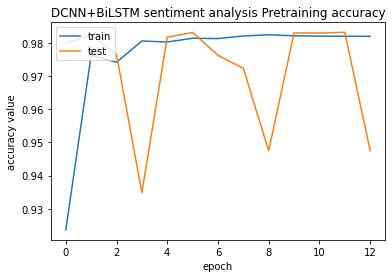

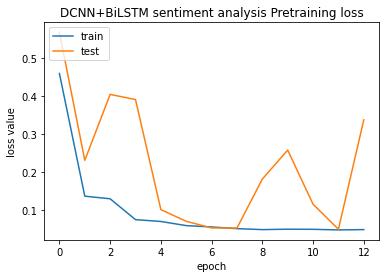

40/40 [==============================] - 5s 132ms/step - loss: 0.3350 - accuracy: 0.9478
Test score: 0.33500951528549194
Test accuracy: 0.9477999806404114
############################################
model roc


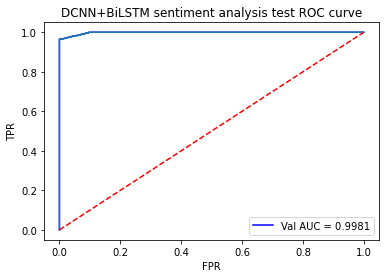

(80000, 256)
九种二元分类器，分别是逻辑回归(LR)、支持向量机(SVM)、Bagging分类器、梯度提升决策树(XGBoost)、K近邻分类器(KNN)、决策树(Dtree)和朴素贝叶斯(NB)
-----SVM分类-----
SVM MCC-train/test 0.9680/0.9650
SVM SP train/test  1.0000/1.0000
SVM SN train/test 0.9671/0.9635
SVM auc-roc train/test  0.9836/0.9818
SVM AUC train/test  0.9836/0.9818
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5063
           1       1.00      0.96      0.98      4937

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

SVM train/test/val accuracies 0.9835/0.9820
SVM train_acc/test_acc/val accuracies 0.9835/0.9820
-----随机森林-------
RF MCC-train/test 0.9830/0.9400
RF SP-train/test  0.9943/0.9745
RF SN-train/test  0.9892/0.9654
RF auc-roc-train/test  0.9918/0.9699
RF AUC-train/test  0.9918/0.9699
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     

/data1/app/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/data1/app/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

KNN MCC-train/test 0.9710/0.9590
KNN SP-train/test 1.0000/0.9939
KNN SN-train/test  0.9711/0.9648
KNN auc-roc-train/test  0.9855/0.9793
KNN auc 0.9793165362933021
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5063
           1       0.99      0.96      0.98      4937

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

KNeighborsClassifier train/test accuracies 0.9855/0.9795
------高斯朴素贝叶斯(NB)-----------
保存gnb模型...
oooo############################################oooo
NB MCC-train/test 0.9680/0.9650
NB SP-train/test  1.0000/1.0000
NB SN-train/test  0.9672/0.9635
NB auc-roc-train/test  0.9836/0.9818
NB auc 0.9817703058537574
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5063
           1       1.00      0.96      0.98      4937

    accuracy                         

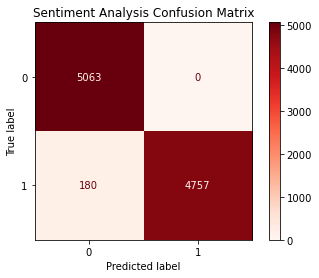

------逻辑回归评估结果-----
LG MCC-train/test 0.9670/0.9640
LG SP-train/test 0.9998/0.9998
LG SN-train/test  0.9673/0.9635
LG auc-roc-train/test  0.9835/0.9817
LogisticRegression auc 0.9816715501753058
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5063
           1       1.00      0.96      0.98      4937

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

LogisticRegression train/test accuracies 0.9835/0.9819
-----决策树分类器-----
保存dtree模型...
oooo############################################oooo
TREE MCC-train/test 0.9860/0.9320
TREE SP-train/test 1.0000/0.9658
TREE SN-train/test  0.9855/0.9664
TREE auc-roc-train/test  0.9928/0.9661
Decision tree auc 0.9661034385819094
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5063
           1       0.97      0.97      0.97      4937



/data1/app/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


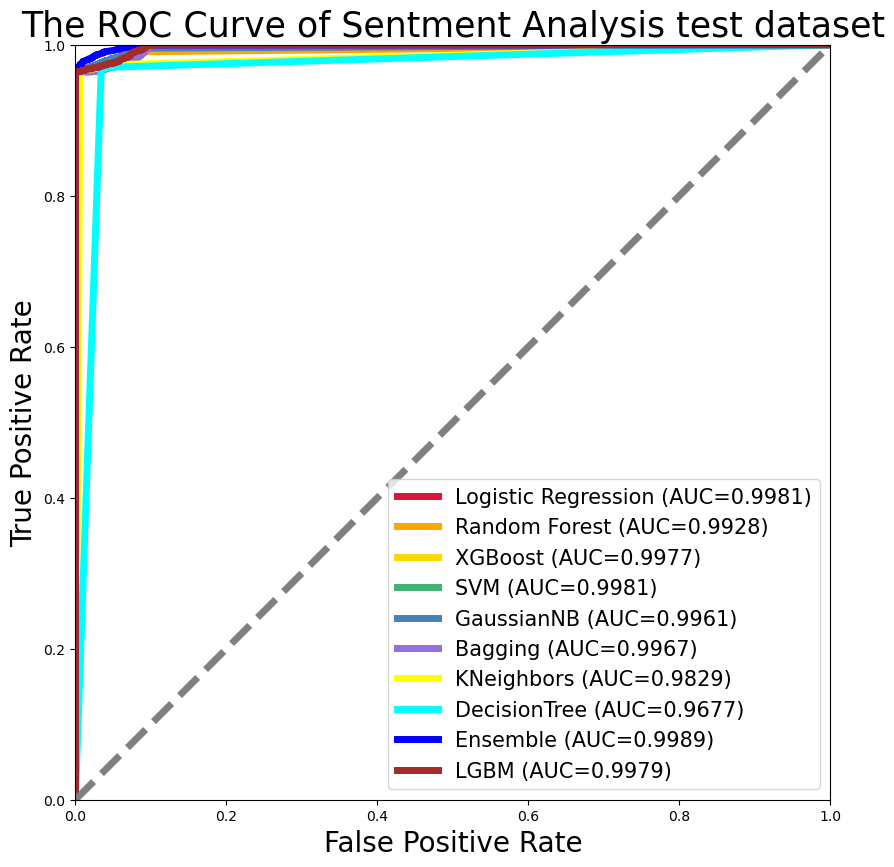

<module 'matplotlib.pyplot' from '/data1/app/miniconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [3]:
import numpy as np
import h5py
import numpy.random
from keras.models import model_from_json
from keras.models import load_model
np.random.seed(24)  # reproducibility
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers import Dense, LSTM, Flatten,Lambda, TimeDistributed, Input, Masking, Bidirectional
from keras.models import Model
from keras.datasets import imdb
import pickle
# import Processingold as pgo
# import Processing as pg
from  keras import regularizers
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
# from sklearn.model_selection import train_test_split
#from keras.utils.vis_utils import plot_model
from tensorflow.python.keras.utils.vis_utils import  plot_model
from tensorflow.python.keras import wrappers
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint
import keras
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from keras.utils import np_utils
# print("未进行特征选择")
# print("-----SVM分类-----")
# from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization
# from tensorflow.python.keras import VGG16
#将VGG16卷积基实例化
# from keras.applications.vgg16 import VGG16
# from sklearn.model_selection import LeaveOneOut
# conv_base=VGG16(weights='imagenet',include_top=False)

seed=20000
max_features = 512
maxlen = 512
embedding_size = 8
# Convolution
nb_filter = 32
pool_length = 2
# BiLSTM
bilstm_output_size = 30
# TrainingSet
batch_size =256
epochs =13

# numpy.random.seed(seed)

X,y=TrainData("train - sentiment.txt")

X1,y1=TrainData("test - sentiment.txt")
# 检查序列长度并进行填充
X = sequence.pad_sequences(X, maxlen=maxlen)
X1 = sequence.pad_sequences(X1, maxlen=maxlen)
y_test=y1
y_train=y
# 假设 seq_line 是您的编码后的评论内容
# 获取当前最大的单词索引
max_index = max(max(seq) for seq in X)

# 更新 max_features 至少为 max_index + 1
max_features = max(max_index + 1, max_features) 


print('Loading data...')

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.15, random_state=seed,shuffle=True)
# y_train=np.array(y_train)
# X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_train = sequence.pad_sequences(X, maxlen=maxlen)
X_test = sequence.pad_sequences(X1, maxlen=maxlen)
X_train = np.array(X_train )
y_train=np.array(y)
X_test = np.array(X_test)
y_test=np.array(y_test)

# from sklearn.decomposition import PCA
# # # PCA方法训练并求取新维度的数据
# pca = PCA()
# pca = pca.fit(X_train)
# X_train = pca.transform(X_train)
# # # print(feat_train.shape)
# # joblib.dump(pca, 'data1/pretrain/pca_modeldataall.model')
# # # pca2 = pca.fit(feat_test)
# X_test = pca.transform(X_test)
# # X1=pca.transform(X1)
# # print(feat_test.shape)

# from sklearn.preprocessing import StandardScaler
# # 数据标准化
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# 调库
# from sklearn.preprocessing import MinMaxScaler
# # 实例化
# scaler = MinMaxScaler()  # 这里的参数能够调整使得范围达到想要结果内  
# # scaler = scaler.fit(data)  # 会生成min(x) 和 max(x)
# # 如果数据量太大 建议使用 scaler.partial_fit(data) 避免报错
# # result = scaler.transform(data)
# ###############################
# X_train = scaler.fit_transform(X_train)  # 一步达成
# X_test = scaler.transform(X_test)
###############################
# 逆转结果
# scaler.inverse_transform(result)
# from sklearn.preprocessing import RobustScaler
# # 数据标准化
# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# from sklearn.preprocessing import power_transform
# # 数据标准化
# scaler = power_transform(X_train)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectFromModel

# # 随机森林分类器
# rfc = RandomForestClassifier(n_estimators=10, random_state=35,criterion='entropy',max_depth=50)

# # 训练随机森林分类器
# rfc.fit(X_train, y_train)

# # 使用随机森林分类器进行特征选择
# sfm = SelectFromModel(rfc, prefit=True, max_features=max_features)
# X_train = sfm.transform(X_train)
# X_test = sfm.transform(X_test)
# # 输出新的训练集和测试集
# print("X_train_new shape:", X_train.shape)
# print("X_test_new shape:", X_test.shape)
# maxlen = X_train.shape[1]
# joblib.dump(sfm, 'data1/pretrain/feature_selection_model.model')

print('Build model...')
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
cvscores=[]
for train,test in kfold.split(X_train,y_train):
    model = Sequential()
    model.add(Embedding(max_features, embedding_size, input_length=maxlen))
    model.add(Dropout(0.5))
    model.add(Convolution1D(filters=nb_filter,
                            kernel_size=5,
                            strides=1,
                            padding='valid',
                            activation='relu'))
    # model.add(Dropout(0.2))
    model.add(MaxPooling1D(pool_size=pool_length))
    model.add(Convolution1D(filters=nb_filter,
                            kernel_size=3,
                            strides=1,
                            padding='valid',
                            activation='relu'))
    # model.add(Dropout(0.2))
    model.add(MaxPooling1D(pool_size=pool_length))
    model.add(Convolution1D(filters=nb_filter,
                            kernel_size=2,
                            strides=1,
                            padding='valid',
                            activation='relu'))
    # model.add(Dropout(0.2))

    model.add(Bidirectional(LSTM(bilstm_output_size, return_sequences=True)))
#     model.add(Dropout(0.3))    
    model.add(Bidirectional(LSTM(bilstm_output_size)))
    # model.add(Dense(units=1024,activation="relu",name="my_seventh_layer",kernel_regularizer=regularizers.l2()))  #增加两个隐层
    # model.add(Bidirectional(GRU(bilstm_output_size, return_sequences=True)))
    # model.add(Bidirectional(GRU(bilstm_output_size)))
    # model.add(Dense(units=512,activation="relu",name="my_sixth_layer",kernel_regularizer=regularizers.l2()))  #增加两个隐层
    # model.add(Dense(units=256,activation="relu",name="my_fifth_layer",kernel_regularizer=regularizers.l2()))  #增加两个隐层
    # model.add(Dropout(0.3))

    model.add(Dense(units=512,activation="relu",name="my_forth_layer",kernel_regularizer=regularizers.l2()))
    # model.add(Dropout(0.3))
    model.add(Dense(units=256,activation="relu",name="my_third_layer",kernel_regularizer=regularizers.l2()))
#     model.add(Dropout(0.3))
    # model.add(Dense(units=64, activation="relu", name="my_second_layer",kernel_regularizer=regularizers.l2()))
    # model.add(Dense(units=16, activation="relu", name="my_first01_layer"))
    # model.add(Dense(units=32, activation="relu", name="my_first_layer",kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(Dense(1,name="my_last_layer",kernel_regularizer=regularizers.l2()))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    # model.add(Activation('Swish'))
#     model.add(Activation('tanh'))
    # optimizer = Adam(lr = 0.001)
    # learnrate=0.05
    # decay=learnrate/(100-epochs)
    model.compile(loss='binary_crossentropy',
                  # loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                  # optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                  metrics=['accuracy']
                  )
    # Training
    print('Training...')


    history = History()
    model_checkpoint = ModelCheckpoint('temp_model.hdf5', monitor='loss', save_best_only=True)
    tb_cb = keras.callbacks.TensorBoard(log_dir='log', write_images=1, histogram_freq=0)
    callbacks = [
        history,
        model_checkpoint,
        tb_cb
    ]

    history = model.fit(X_train[train], y_train[train], batch_size=batch_size,
                        epochs=epochs, verbose=1, callbacks=callbacks,
                        validation_data=(X_train[test], y_train[test]),
                        # class_weight={0:3,1:1}
                        )
    scores=model.evaluate(X_train[test],y_train[test],verbose=1)
    print("%s:%.2f%%" % (model.metrics_names[1],scores[1]*100))
    cvscores.append(scores[1]*100)
scrore=numpy.mean(cvscores)
std=numpy.std(cvscores)

print('5 fold mean score:', scrore)
print('5 fold std score:', std)
# print('leaveone mean score:', scrore)
# print('leaveone  std score:', std)
# model.save('data1/pretrain/fine_tune_model.h5')
# model.save_weights('data1/pretrain/fine_tune_model_weight')
print(model.summary())
print(history.history)
from matplotlib import pyplot as plt

history = history
plt.plot()
# summarize history for acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DCNN+BiLSTM sentiment analysis Pretraining accuracy')
plt.ylabel('accuracy value')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DCNN+BiLSTM sentiment analysis Pretraining loss')
plt.ylabel('loss value')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
from sklearn.metrics import classification_report

# X_test = sequence.pad_sequences(X1, maxlen=maxlen)
# y_test=y1

import numpy as np
from sklearn import metrics
accy = history.history['accuracy']
np_accy = np.array(accy)
# np.savetxt('data1/pretrain/save_acc.txt', np_accy)
model.save('data1/pretrain/sentment/dcnnmodel.h5')
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
print('############################################')

print("model roc")
pred = model.predict(X_test)
# print("xtest",X_test)
# print("ypre",pred)
#############画图部分

import matplotlib.pyplot as plt
fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr1, tpr1)
plt.title('DCNN+BiLSTM sentiment analysis test ROC curve')
plt.plot(fpr1, tpr1, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(fpr1, tpr1)
plt.plot([0, 1], [0, 1],'r--')
plt.title('DCNN+BiLSTM sentiment analysis test ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


# # # y_train_pred = glt.predict(feat_train)
# y_test_pred = model.predict(X_test)
# y_test_pred =np.argmax(y_test_pred)
# # glt_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
# # cnn_test = accuracy_score(y_test,y_test_pred)  #测试集准确率
# # auc=metrics.roc_auc_score(y_test,y_test_pred)

# # auctrian=metrics.roc_auc_score(y_train,y_train_pred)
# aucteast=metrics.roc_auc_score(y_test,y_test_pred)

# # mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)

# mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
# # metrics_out=confusion_matrix(y_train,y_train_pred)
# # Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
# # Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
# metrics_out=confusion_matrix(y_test,y_test_pred)
# Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
# Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
# print('cnn MC test %.4f' % (mcctest))
# print('cnn SPtest  %.4f' % (Specificitytest))
# print('cnn SNtest  %.4f' % (Sensitivityteast))
# print('cnn auc-roc-test  %.4f' % (aucteast))
# # print("cnn auc",auc)
# print(classification_report(y_test,y_test_pred))
# print('cnn test accuracies %.4f' % (cnn_test))

# X_test = sequence.pad_sequences(X1, maxlen=maxlen)
# y_test=y1
# print("x_test_new",X_test.shape)
# print("y_test_new",y_test)

# X_train = sequence.pad_sequences(X, maxlen=maxlen)
# y_train=y

# # 数据预处理
# scaler = MinMaxScaler()
# X_test= scaler.fit_transform(X_test)
# 特征提取
# print("valcnnmodel roc")
# pred = model.predict(X_test)
# # print("xtest",X_test)
# # print("ypre",pred)
# #############画图部分
# #
# import matplotlib.pyplot as plt
# fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred)
# roc_auc = metrics.auc(fpr1, tpr1)
# plt.title('CNN+BiLSTM Predict ROC curve')
# plt.plot(fpr1, tpr1, 'b', label = 'cnn AUC = %0.3f' % roc_auc)
# plt.legend(loc='lower right')
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.plot(fpr1, tpr1)
# plt.plot([0, 1], [0, 1],'r--')
# plt.title('CNN+BiLSTM Predict ROC curve')
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.show()


from sklearn.decomposition import PCA
model_feat = Model(inputs=model.input,outputs=model.get_layer('my_third_layer').output) #dnnbilstm模型特征输入
feat_train = model_feat.predict(X_train)#dnnbilstm模型进行特征提取
print(feat_train.shape)
feat_test = model_feat.predict(X_test)

from sklearn.preprocessing import RobustScaler
# 数据标准化
scaler = RobustScaler()
feat_train = scaler.fit_transform(feat_train)
feat_test = scaler.transform(feat_test)

# from sklearn.decomposition import PCA
# # # PCA方法训练并求取新维度的数据
# pca = PCA()
# pca = pca.fit(feat_train)
# feat_train = pca.transform(feat_train)
# # # print(feat_train.shape)
# # joblib.dump(pca, 'data1/pretrain/pca_modeldataall.model')
# # # pca2 = pca.fit(feat_test)
# feat_test = pca.transform(feat_test)
# print(feat_test.shape)
# #
# pca.explained_variance_# 查看降维后每个新特征向量上所带的信息量大小（方差大小）
# pca.explained_variance_ratio_#查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
# pca.explained_variance_ratio_.sum()#总占比

# from sklearn.preprocessing import StandardScaler
# # 数据标准化
# scaler = StandardScaler()
# feat_train = scaler.fit_transform(feat_train)
# feat_test = scaler.transform(feat_test)

# from sklearn.decomposition import PCA
# # # PCA方法训练并求取新维度的数据
# pca = PCA()
# pca = pca.fit(feat_train)
# feat_train = pca.transform(feat_train)
# # # print(feat_train.shape)
# joblib.dump(pca, 'data1/pretrain/pca_modeldataall.model')
# # # pca2 = pca.fit(feat_test)
# feat_test = pca.transform(feat_test)
# print(feat_test.shape)

# # # LDA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# LDA= LinearDiscriminantAnalysis().fit(feat_train, y_train)
# feat_train=LDA.transform(feat_train)
# # print('LDA模型为: \n', lda)
# # test = LinearDiscriminantAnalysis().fit(feat_test,y_test)
# feat_test = LDA.transform(feat_test)

print("九种二元分类器，分别是逻辑回归(LR)、支持向量机(SVM)、Bagging分类器、梯度提升决策树(XGBoost)、K近邻分类器(KNN)、决策树(Dtree)和朴素贝叶斯(NB)")
# import io
# import sys
# sys.stdout = io.TextIOWrapper(sys.stdout.buffer, encoding='utf-8')
# Accuracy、AUC、Recall、Precision、F1-Score
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# print("未进行特征选择")
print("-----SVM分类-----")
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
svm = SVC(C=5,kernel='poly',gamma=0.2,degree=3,coef0=0.8,tol=1e-3)
svm.fit(feat_train, y_train)
joblib.dump(svm, 'data1/pretrain/SVM_modeldataall.model')
# svm.save('data1/pretrain/svm_modeldataall.model')
y_train_pred = svm.predict(feat_train)
y_test_pred = svm.predict(feat_test)
# y_val_pred=svm.predict(feat_val)
# score1=cross_val_score(svm,feat_train,y_train,cv=10)
# print("svm 10折交叉验证训练集SVM",score1)
# score1=cross_val_score(svm,feat_test,y_test,cv=10)
# print("svm 10折交叉验证测试集SVM",score1)
svm_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
svm_test = accuracy_score(y_test,y_test_pred)  #测试集准确率
# svm_val=accuracy_score(y_val,y_val_pred)  #验证集准确率
auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
svm_train_acc =(metrics_out[1][1]+metrics_out[0][0])/ (metrics_out[1][0] + metrics_out[1][1]+metrics_out[0][0] + metrics_out[0][1]) #训练集准确率
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
svm_test_acc =(metrics_out[1][1]+metrics_out[0][0])/ (metrics_out[1][0] + metrics_out[1][1]+metrics_out[0][0] + metrics_out[0][1]) #训练集准确率

print('SVM MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('SVM SP train/test  %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('SVM SN train/test %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('SVM auc-roc train/test  %.4f/%.4f' % (auctrian,aucteast))
print('SVM AUC train/test  %.4f/%.4f' % (AUCtrian,AUCteast))
print(classification_report(y_test,y_test_pred))
print('SVM train/test/val accuracies %.4f/%.4f' % (svm_train,svm_test))
print('SVM train_acc/test_acc/val accuracies %.4f/%.4f' % (svm_train_acc,svm_test_acc))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("-----随机森林-------")
####随机森林0-1分类模型
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(n_estimators=10, random_state=35,criterion='entropy',max_depth=50)
RF.fit(feat_train, y_train)
joblib.dump(RF, 'data1/pretrain/RF_modeldataall.model')
y_train_pred = RF.predict(feat_train)
y_test_pred = RF.predict(feat_test)
tree_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
tree_test = accuracy_score(y_test,y_test_pred)  #测试集准确率

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('RF MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('RF SP-train/test  %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('RF SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('RF auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print('RF AUC-train/test  %.4f/%.4f' % (AUCtrian,AUCteast))
# auc=metrics.roc_auc_score(y_test,y_test_pred)
# print("RF auc",auc)
print(classification_report(y_test,y_test_pred))
print('RandomForestClassifier train/test accuracies %.4f/%.4f' % (tree_train,tree_test))

# XGBOOST
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
print("xgbost------")
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
xgbmodel = xgb.XGBClassifier(max_depth=50, n_estimators=100, learning_rate=0.1,
                          colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic',
                          eta=0.3,subsample=0.8).fit(feat_train, y_train)
joblib.dump(xgbmodel, 'data1/pretrain/XGB_modeldataall.model')
y_train_pred = xgbmodel.predict(feat_train)
y_test_pred = xgbmodel.predict(feat_test)
xgb_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
xgb_test = accuracy_score(y_test,y_test_pred)  #测试集准确率

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('xgb MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('xgb SP-train/test  %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('xgb SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('xgb auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
# print('RF AUC-train/test MCC-trian %.3f/%.3f' % (AUCtrian,AUCteast))
# auc=metrics.roc_auc_score(y_test,y_test_pred)
# print("xgbost auc",auc)
print(classification_report(y_test,y_test_pred))
print('xgbost train/test accuracies %.4f/%.4f' % (xgb_train,xgb_test))
# prediction = model.predict(X_test)
# cm = confusion_matrix(y_test, prediction)
# print(cm)
# print('Accuracy', accuracy_score(y_test, prediction))
# print(classification_report(y_test, prediction))

print("---------knn评估-------")
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2,p=1,metric='euclidean')
knn.fit(feat_train,y_train)
joblib.dump(knn, 'data1/pretrain/KNN_modeldataall.model')
y_train_pred = knn.predict(feat_train)
y_test_pred = knn.predict(feat_test)
tree_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
tree_test = accuracy_score(y_test,y_test_pred)  #测试集准确率
auc=metrics.roc_auc_score(y_test,y_test_pred)

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
# fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
# AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
# fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
# AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('KNN MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('KNN SP-train/test %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('KNN SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('KNN auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print("KNN auc",auc)
print(classification_report(y_test,y_test_pred))
print('KNeighborsClassifier train/test accuracies %.4f/%.4f' % (tree_train,tree_test))
# k_preduct=knn.predict(X_test)
# print("knn准确率",accuracy_score(y_test,k_preduct))


print("------高斯朴素贝叶斯(NB)-----------")
from  sklearn.naive_bayes import GaussianNB
glt = GaussianNB(var_smoothing=1e-05)
glt.fit(feat_train, y_train)
print('保存gnb模型...')
joblib.dump(glt, 'data1/pretrain/GNB_modeldataall.model')
print('oooo############################################oooo')
y_train_pred = glt.predict(feat_train)
y_test_pred = glt.predict(feat_test)
glt_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
glt_test = accuracy_score(y_test,y_test_pred)  #测试集准确率
auc=metrics.roc_auc_score(y_test,y_test_pred)

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)

mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)

mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('NB MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('NB SP-train/test  %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('NB SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('NB auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print("NB auc",auc)
print(classification_report(y_test,y_test_pred))
print('GaussianNB train/test accuracies %.4f/%.4f' % (glt_train,glt_test))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred, display_labels=["0", "1"], cmap=plt.cm.Reds, colorbar=True)
plt.title("Sentiment Analysis Confusion Matrix")
plt.show()



print("------逻辑回归评估结果-----")
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state=35,max_iter=128,tol=10,penalty='l2',solver='sag')
lg.fit(feat_train, y_train)
joblib.dump(lg, 'data1/pretrain/LG_modeldataall.model')
y_train_pred = lg.predict(feat_train)
y_test_pred = lg.predict(feat_test)
tree_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
tree_test = accuracy_score(y_test,y_test_pred)  #测试集准确率
auc=metrics.roc_auc_score(y_test,y_test_pred)

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
# fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
# AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
# fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
# AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('LG MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('LG SP-train/test %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('LG SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('LG auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print("LogisticRegression auc",auc)
print(classification_report(y_test,y_test_pred))
print('LogisticRegression train/test accuracies %.4f/%.4f' % (tree_train,tree_test))
# y_pre=lg.predict(X_test)
# print("逻辑回归准确率",lg.score(y_pre, y_test))
# print(classification_report(y_test, y_pre))

print("-----决策树分类器-----")
## 我们使用单一决策树分类：
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None)   #选择决策树为基本分类器
from sklearn.metrics import accuracy_score  #计算准确率
tree = treemodel.fit(feat_train,y_train)
print('保存dtree模型...')
#svm_model.save('svm_model.model')
joblib.dump(tree, 'data1/pretrain/dtree_modeldataall.model')
print('oooo############################################oooo')
y_train_pred = tree.predict(feat_train)
y_test_pred = tree.predict(feat_test)
tree_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
tree_test = accuracy_score(y_test,y_test_pred)  #测试集准确率
auc=metrics.roc_auc_score(y_test,y_test_pred)

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
# fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
# AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
# fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
# AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('TREE MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('TREE SP-train/test %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('TREE SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('TREE auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print("Decision tree auc",auc)
print(classification_report(y_test,y_test_pred))
print('Decision tree train/test accuracies %.4f/%.4f' % (tree_train,tree_test))
#Decision tree train/test accuracies 1.000/0.833

print("-----bagging分类器-----")
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None)   #选择决策树为基本分类器
bag = BaggingClassifier(base_estimator=tree,n_estimators=50,max_samples=1.0,max_features=1.0,bootstrap=True,
                        bootstrap_features=False,n_jobs=1,random_state=1)
from sklearn.metrics import accuracy_score
bag = bag.fit(feat_train,y_train)
joblib.dump(bag, 'data1/pretrain/BAG_modeldataall.model')
y_train_pred = bag.predict(feat_train)
y_test_pred = bag.predict(feat_test)
bag_train = accuracy_score(y_train,y_train_pred)
bag_test = accuracy_score(y_test,y_test_pred)
auc=metrics.roc_auc_score(y_test,y_test_pred)

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
# fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
# AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('Bagging MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('Bagging SP-train/test  %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('Bagging SN-train/test %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('Bagging auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print("Bagging auc",auc)
print(classification_report(y_test,y_test_pred))
print('Bagging train/test accuracies %.4f/%.4f' % (bag_train,bag_test))

print("-----LightGBM分类器-----")
from sklearn.model_selection import GridSearchCV
import pandas as pd
from lightgbm.sklearn import LGBMClassifier# 导入LGBMClassifier函数
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 分类结果评价函数
lgbestimator = LGBMClassifier()

estimator = LGBMClassifier(verbosity=-1)
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40,80,100],
    'min_data_in_leaf':[20, 40,50],
}
gbm = GridSearchCV(estimator, param_grid)
lgb=gbm.fit(feat_train, y_train)
print('Best parameters found by grid search are:', gbm.best_params_)
# lgb=model.fit(feat_train, y_train)  # 在训练集上训练模型
# print(model)
print('保存lgb模型...')
#svm_model.save('svm_model.model')
joblib.dump(lgb, 'data1/pretrain/lgb_modeldataall.model')
print('oooo############################################oooo')
y_train_pred = lgb.predict(feat_train)
y_test_pred = lgb.predict(feat_test)
lgb_train = accuracy_score(y_train,y_train_pred)  #训练集准确率
lgb_test = accuracy_score(y_test,y_test_pred)  #测试集准确率
auc=metrics.roc_auc_score(y_test,y_test_pred)

auctrian=metrics.roc_auc_score(y_train,y_train_pred)
aucteast=metrics.roc_auc_score(y_test,y_test_pred)
# fpr, tpr, thresholds = roc_curve(y_train,y_train_pred)
# AUCtrian = auc(fpr, tpr)
mcctrian = round(metrics.matthews_corrcoef(y_train,y_train_pred),3)
# fpr, tpr, thresholds = roc_curve(y_test,y_test_pred)
# AUCteast = auc(fpr, tpr)
mcctest = round(metrics.matthews_corrcoef(y_test, y_test_pred),3)
metrics_out=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivityteast= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
print('lgb MCC-train/test %.4f/%.4f' % (mcctrian,mcctest))
print('lgb SP-train/test %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('lgb SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('lgb auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
print("lgb auc",auc)
print(classification_report(y_test,y_test_pred))
print('lgb train/test accuracies %.4f/%.4f' % (lgb_train,lgb_test))

print("###########集成学习#############")
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

estimators=[('rf',RandomForestClassifier(n_estimators=100,max_depth=None)),
            # ('kneiber',KNeighborsClassifier(n_neighbors=5,leaf_size=30,metric="minkowski")),
            ('svm',SVC(C=5,kernel='poly',gamma=0.2,degree=3,coef0=0.8,tol=1e-3,max_iter=100000)),
            ('guss',GaussianNB()),
            ('xgb',xgb.XGBClassifier(max_depth=50, n_estimators=100, learning_rate=0.1,
                          colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic',
                          eta=0.3,subsample=0.8)),
            ('lgb', LGBMClassifier(learning_rate=0.1,n_estimators=100,verbosity=-1)),
#             ('dec',DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None)),
            ('bag', BaggingClassifier(base_estimator=tree,n_estimators=50,max_samples=1.0,max_features=1.0,bootstrap=True,
                        bootstrap_features=False,n_jobs=1,random_state=1)),
            # ('logr',LogisticRegression(random_state=1000,max_iter=128,tol=5,penalty='l2',solver='sag'))
            ]

final_estimator=GradientBoostingClassifier(n_estimators=25,subsample=1.0,min_samples_leaf=25,
                                           max_features=None,random_state=42)

modelesemble=StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

esemble=modelesemble.fit(feat_train,y_train)
joblib.dump(esemble, 'data1/pretrain/ESEM_modeldataall.model')
train_pre=modelesemble.predict(feat_train)
test_pre=modelesemble.predict(feat_test)
# print("集成模型train_pre",train_pre)
# print("集成模型test_pre",test_pre)
# val_pre=reg.predict(feat_val)
metrics_outtrain=confusion_matrix(y_train,y_train_pred)
Specificitytrian = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytrian = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
# print("集成学习训练集train,sn,sp",Sensitivitytrian,Specificitytrian)
enmcctrian = round(metrics.matthews_corrcoef(y_train,train_pre),3)
enmcctest = round(metrics.matthews_corrcoef(y_test, test_pre),3)
metrics_out=confusion_matrix(y_test,y_test_pred)
Specificitytest = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
Sensitivitytest= metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
# print("test,sn,sp",Sensitivitytest,Specificitytest)
# metrics_out=confusion_matrix(y_val,y_val_pred)
# Sensitivityval = metrics_out[0][0] / (metrics_out[0][0] + metrics_out[0][1])
# Specificityval = metrics_out[1][1] / (metrics_out[1][0] + metrics_out[1][1])
# print('集成学习 SP-train/test %.4f/%.4f' % (Specificitytrian,Specificitytest))
# print('集成学习 SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
# print("val,sn,sp",Sensitivityval,Specificityval)
en_train=accuracy_score(y_train,train_pre)
en_test = accuracy_score(y_test,test_pre)
# en_val = accuracy_score(y_val,val_pre)
# print("集成学习训练集精确度",en_train)
# print("集成学习开发集精确度",en_test)
# print("集成学习验证集精确度",en_val)
auctrian=metrics.roc_auc_score(y_train,train_pre)
aucteast=metrics.roc_auc_score(y_test,test_pre)
# print('集成学习 auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))

print('esemble MCC-train/test %.4f/%.4f' % (enmcctrian,enmcctest))
print('esemble SP-train/test  %.4f/%.4f' % (Specificitytrian,Specificitytest))
print('esemble SN-train/test  %.4f/%.4f' % (Sensitivitytrian,Sensitivityteast))
print('esemble auc-roc-train/test  %.4f/%.4f' % (auctrian,aucteast))
# print("esemble auc",auc)
print(classification_report(y_test,test_pre))
print('esemble train/test accuracies %.4f/%.4f' % (en_train,en_test))




#shap explain
# import matplotlib.pyplot as plt
# import shap
# # Assign the feature matrix to X and the target vector to y
# plt.rcParams['axes.unicode_minus']=False
# X = feat_train
# y = y_train
# # feature_names = X.feature_names
# # print('feature_names',feature_names)
# explainer = shap.Explainer(lg, X)
# shap_values = explainer(X)
# # 绘制特征重要性图表
# shap.summary_plot(shap_values, X)
# #heat
# shap.plots.heatmap(shap_values)
# #bar
# shap.summary_plot(shap_values, X, plot_type="bar")

# # 展示图表
# plt.show()


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

svm = SVC(probability=True)


def plot_roc_curve(name, method, colorname, X_test, y_test):
    """
    绘制单个模型的ROC曲线
    Args:
        name: str, 模型的名称
        method: 模型的实例化对象
        colorname: str, 曲线的颜色名称
        X_test: 测试数据集的特征
        y_test: 测试数据集的标签
    """
    y_test_preds = method.predict(X_test)
    y_test_predprob = method.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=5, label='{} (AUC={:.4f})'.format(name, roc_auc), color=colorname)


def multi_models_roc(names, sampling_methods, colors, X_test, y_test, save=True, dpi=100):
    """
    将多个机器模型的ROC曲线输出到一张图上
    Args:
        names: list, 多个模型的名称
        sampling_methods: list, 多个模型的实例化对象
        X_test: 测试数据集的特征
        y_test: 测试数据集的标签
        save: bool, 选择是否将结果保存（默认为True）
        dpi: int, 图像的分辨率（默认为100）
    Returns:
        返回图片对象plt
    """
    plt.figure(figsize=(10, 10), dpi=dpi)
    for (name, method, colorname) in zip(names, sampling_methods, colors):
        plot_roc_curve(name, method, colorname, X_test, y_test)
    plt.plot([0, 1], [0, 1], '--', lw=5, color='grey')
    plt.axis('square')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate', fontsize=20)
    plt.ylabel('True Positive Rate', fontsize=20)
    # plt.title('The ROC Curve of the alternative test dataset with StandardScaler ', fontsize=20)
    plt.title('The ROC Curve of Sentment Analysis test dataset', fontsize=25)
    plt.legend(loc='lower right', fontsize=15)
    # plt.subplots_adjust(top=1, bottom=1, right=1, left=1, hspace=0, wspace=0)
    plt.margins(0, 0)
    if save:
        # plt.savefig('cancerdata/mainresult/multi_models_roc.png', bbox_inches='tight')
        plt.savefig('sentment/SentmentAnalysismulti_models_roc.png')
    plt.show()
    return plt


names = ['Logistic Regression',
         'Random Forest',
         'XGBoost',
         'SVM',
         'GaussianNB',
         'Bagging',
         'KNeighbors',
         'DecisionTree',
         'Ensemble',
         'LGBM']
sampling_methods = [lg,
                    RF,
                    xgbmodel,
                    svm,
                    glt,
                    bag,
                    knn,
                    treemodel,
                    modelesemble,
                    lgbestimator
                    ]
colors = ['crimson',
          'orange',
          'gold',
          'mediumseagreen',
          'steelblue',
          'mediumpurple',
          'yellow',
          'cyan',
          'blue',
          'brown'
          ]
# 训练每个模型
for method in sampling_methods:
    method.fit(feat_train, y_train)
# #train roc figure
# multi_models_roc(names, sampling_methods, colors, feat_train, y_train, save=True, dpi=100)
#test roc figure
multi_models_roc(names, sampling_methods, colors, feat_test, y_test, save=True, dpi=100)
